In [3]:
import numpy as np
import os
import struct


def load_binaries(file_name):
    path = os.path.join(os.getcwd(), file_name)

    with open(path, 'rb') as fd:
        check, items_n = struct.unpack(">ii", fd.read(8))

        if "images" in file_name and check == 2051:
            height, width = struct.unpack(">II", fd.read(8))
            images = np.fromfile(fd, dtype = 'uint8')
            return np.reshape(images, (items_n, height, width))
        elif "labels" in file_name and check == 2049:
            return np.fromfile(fd, dtype = 'uint8')
        else:
            raise ValueError("Not a MNIST file: " + path)

In [4]:
training_data = load_binaries("train-images.idx3-ubyte")
training_labels = load_binaries("train-labels.idx1-ubyte")
test_data = load_binaries("t10k-images.idx3-ubyte")
test_labels = load_binaries("t10k-labels.idx1-ubyte")

In [5]:
data = list(training_data)
data.extend(list(test_data))

labels = list(training_labels)
labels.extend(list(test_labels))

data = np.array(data)
labels = np.array(labels)

In [6]:
label_to_data = {}
for x in range(10):
    label_to_data[x] = data[labels==x]

In [7]:
import matplotlib.pyplot as plt

In [8]:
labels.shape

(70000,)

0


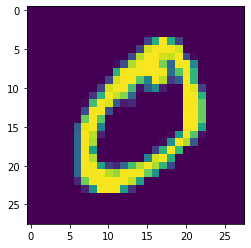

In [9]:
plt.imshow(data[1])
print(labels[1])

In [17]:
import random
def generate_dataset(label_to_data, outpath = "", width=2048,height=2048, n_samples_to_generate = 10, 
                     n_patches_per_img=200, retry_adding=10, n_classes=10):
    coords = []
    out_imgs = []
    for filename in range(n_samples_to_generate):
        out_img = np.zeros(shape=(height,width))
        occupied = np.zeros(shape=(height,width))

        current_coords = [[] for x in range(n_classes)]
        for _ in range(n_patches_per_img):
            for repeat in range(retry_adding):
    
                number = random.randint(0,9)
                idx = random.randint(0,len(label_to_data[number])-1)
                patch = label_to_data[number][idx]
                
                y = random.randint(0,height-1-patch.shape[0])
                x = random.randint(0,width-1-patch.shape[1])
                
                if np.any(occupied[y:y+patch.shape[0],x:x+patch.shape[1]]):
                    continue
                occupied[y:y+patch.shape[0],x:x+patch.shape[1]] = 1
                
                out_img[y:y+patch.shape[0],
                        x:x+patch.shape[1]] = patch
                
                current_coords[number].append([y+patch.shape[0]/2,x+patch.shape[1]/2])
                break
        coords.append(current_coords)
        out_imgs.append(out_img)#TODO: Save image as filename.jpg in outpath instead
        
    return np.array(out_imgs), coords#TODO: Save coords as csv via numpy instead
        

In [36]:
imgs, labels = generate_dataset(label_to_data,n_samples_to_generate=1,n_patches_per_img=50000)

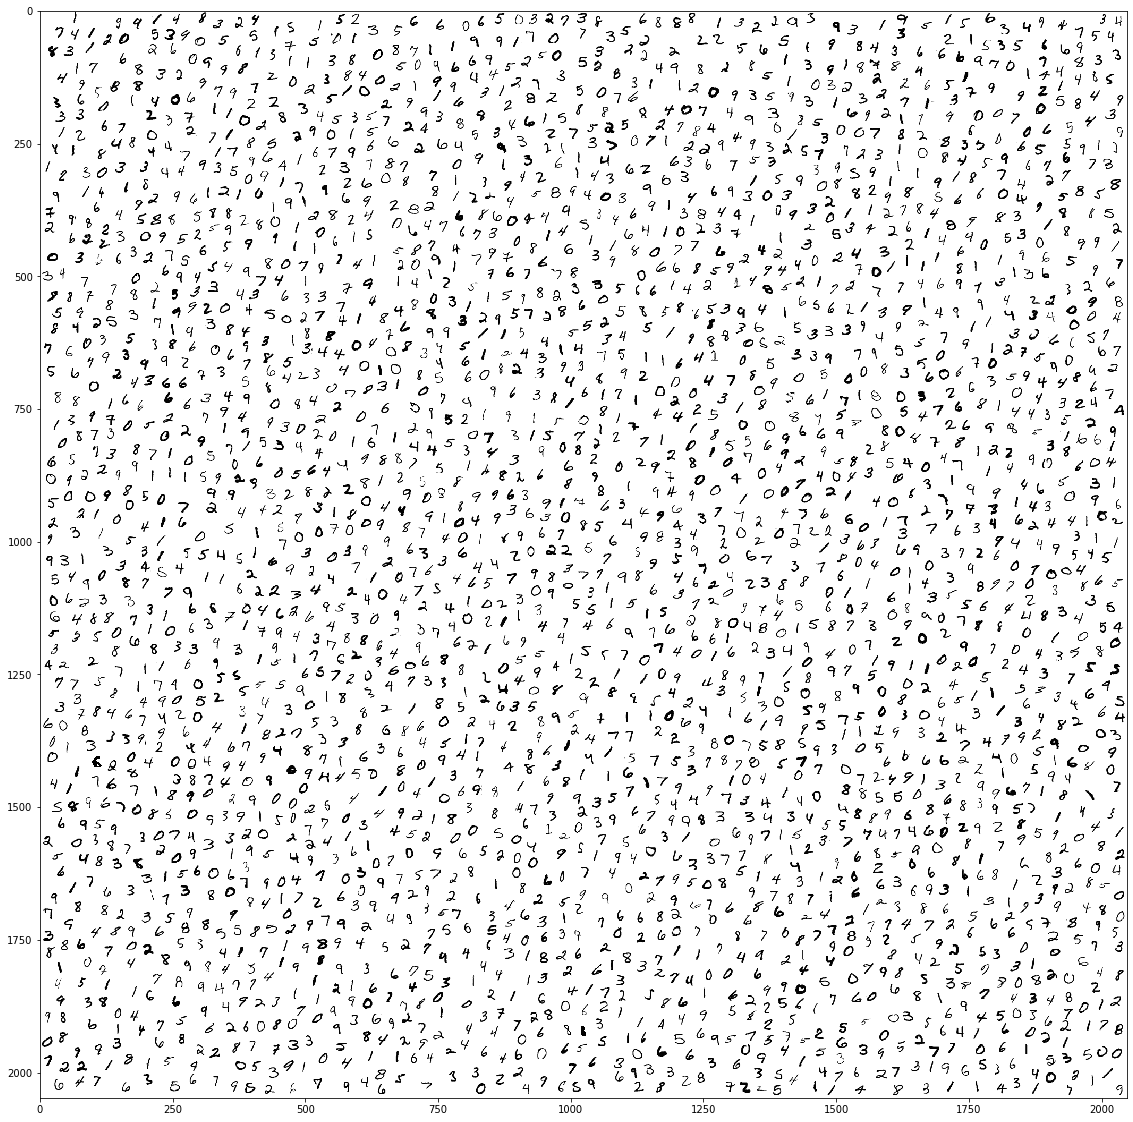

In [37]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(-imgs[0],cmap="gray")

In [247]:
labels

[[[[40.0, 135.0],
   [118.0, 29.0],
   [130.0, 125.0],
   [173.0, 161.0],
   [28.0, 165.0]],
  [[72.0, 40.0], [19.0, 224.0]],
  [[226.0, 82.0], [76.0, 194.0]],
  [[93.0, 166.0],
   [23.0, 196.0],
   [227.0, 112.0],
   [131.0, 233.0],
   [96.0, 77.0],
   [56.0, 164.0],
   [101.0, 227.0]],
  [[80.0, 106.0]],
  [[69.0, 222.0], [18.0, 65.0]],
  [[44.0, 95.0],
   [161.0, 71.0],
   [125.0, 75.0],
   [158.0, 40.0],
   [107.0, 196.0],
   [238.0, 45.0]],
  [[198.0, 78.0]],
  [[215.0, 220.0],
   [145.0, 184.0],
   [177.0, 197.0],
   [100.0, 134.0],
   [212.0, 187.0],
   [133.0, 156.0],
   [69.0, 134.0]],
  [[219.0, 17.0],
   [182.0, 239.0],
   [176.0, 115.0],
   [26.0, 31.0],
   [187.0, 38.0],
   [222.0, 153.0],
   [16.0, 97.0],
   [241.0, 191.0]]],
 [[[115.0, 231.0],
   [33.0, 214.0],
   [76.0, 56.0],
   [35.0, 178.0],
   [207.0, 209.0],
   [135.0, 19.0]],
  [[132.0, 169.0],
   [166.0, 141.0],
   [47.0, 147.0],
   [94.0, 14.0],
   [48.0, 21.0],
   [190.0, 170.0],
   [77.0, 112.0],
   [150.0, 22

In [165]:
out_img = np.zeros(shape=(200,400))
out_img[247:247+28,53:53+28].shape

(0, 28)

In [25]:
random.randint(0,1)

1

In [73]:
imgs = np.asarray([[[1,1],[1,1]],[[2,2],[2,2]],[[3,3],[3,3]],[[4,4],[4,4]],[[5,5],[5,5]]])

In [77]:
vals = np.asarray([0,9,3,5,2])

In [84]:
imgs[vals==0]

array([[[1, 1],
        [1, 1]]])

In [ ]:
for x in imgs:
    {}